# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function: (somma di due gaussiane)
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$. Dobbiamo trovare le mu e sigma ottimali.</span>.

### Exercise 08.1

Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using a uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
<span style="color:red">Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:</span>
    
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

Questo conto è necessario perchè ...?
Possiamo tranquillamente usare codice dall'es 5, adattato ad hoc.
Usiamo h = 1, m = 1. Quindi h tagliato è: ...?


Adesso dobbiamo ottimizzare questa energia, quindi ci serve una stima con errorbar piccola, che realizziamo usando opportune quantità e dimensioni di blocchi.

Più siamo precisi più il risultato è accurato, obv.


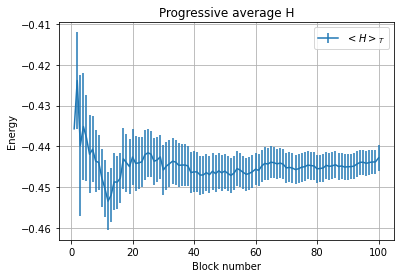

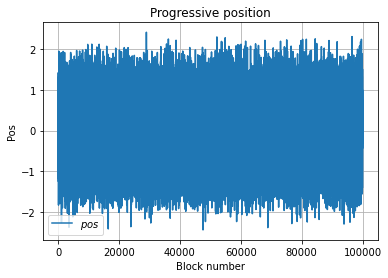

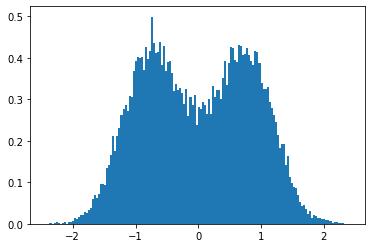

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

pos, ave, err = np.loadtxt("ex8/result.out", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x, ave, yerr = err, label = "$<H>_T$") 

plt.ylabel('Energy')
plt.xlabel('Block number')
plt.grid(True)
#plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('Progressive average H')
plt.legend()

plt.show()

#---------------------------------------

histofill_blk = 1000                   # numero di posizioni salvate per blocco (cfr input.dat)
x = np.arange(histofill_blk*N)+1      # uso l'ordinamento da 1 a N

pos = np.loadtxt("ex8/pos.out", usecols=(0), delimiter=' ', unpack='true')
plt.plot(x, pos, label = "$pos$") 
plt.ylabel('Pos')
plt.xlabel('Block number')
plt.grid(True)
plt.title('Progressive position')
plt.legend()

plt.show()

#-----------------------------------------
# nota: se sembra un'uniga gaussiana è colpa del principio di risolubilità di rayleigh:
# i picchi delle gaussiane sono distanti circa come le loro ampiezze

plt.hist(pos, 150, density = "true") # <<<< il numero di bin deve essere ottimizzato: 
                                     # se ne ho troppi, ciascuno contiente troppi pochi valori, e viceversa
plt.show()

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Dobbiamo quindi fare un ulteriore metropolis per prendere o no i nuovi parametri: se l'energia (val aspett di H) diminuisce, allora deltaH ci fa accettare, altrimenti accettiamo con probabilità q.

Partire con mu, sigma, T sensati. Equilibrare. Poi fare x passi, abbassare T, fare altri passi, ecc... fino a temperature bassissime dove ci fermiamo. Dobbiamo scegliere deltaT, dim passo, ...

T è un parametro fittizio, che misura la capacità di andare a visitare stati lontani dall'optimum.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm (ovvero non di T, ma dei passi stessi, o di beta). obiettivo: mostrare la convergenza. </span> Volendo possiamo guardare la traiettoria nello spazio mu,sigma, step. é una curva in R3, con dominio {mu, sigma} e codominio H, e step è la coordinata naturale della curva. **PROBLEMA: calcolo errH come? come lo stiamo facendo ora dà errore troppo piccolo :(**
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$ (quindi solo per i parametri finali, ottimali)</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

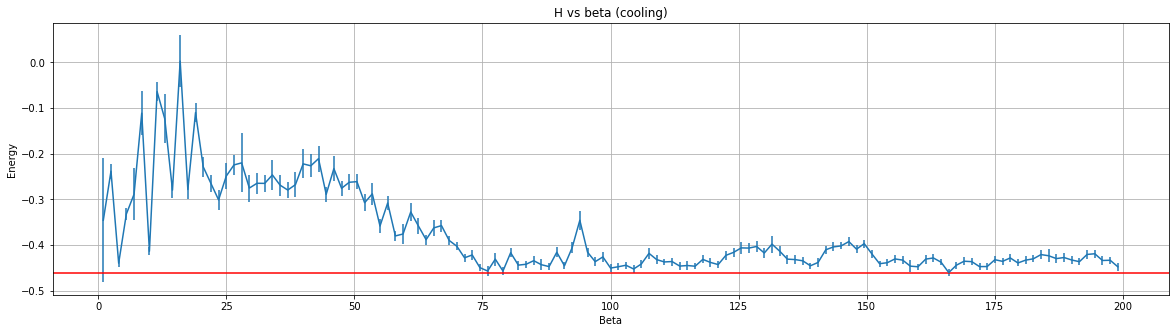

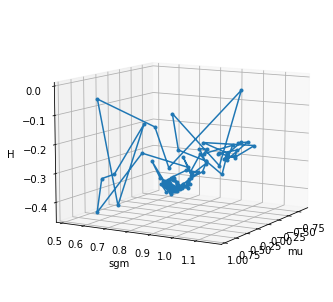

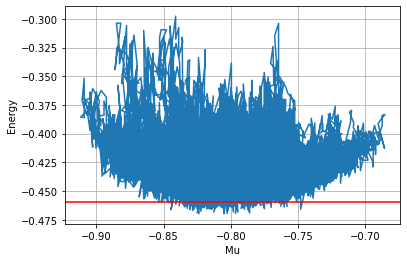

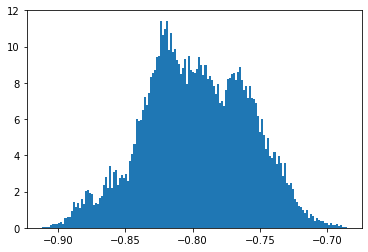

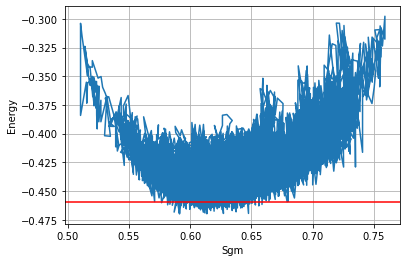

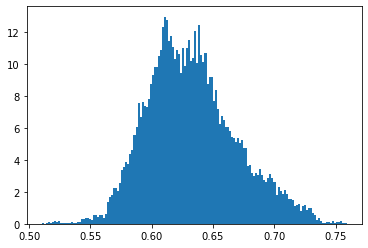

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)+1      # uso l'ordinamento da 1 a N

fig=plt.figure(figsize = (20,5))
beta, mu, sgm, H, errH = np.loadtxt("ex8/traj.out", usecols=(0,1,2,3,4), delimiter=' ', unpack='true')
plt.errorbar(beta, H, errH)

plt.ylabel('Energy')
plt.xlabel('Beta')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r', linestyle = '-')
plt.title('H vs beta (cooling)')
#plt.legend()

plt.show()

# Nota: nella parte finale i valori oscillano complessivamente non meno di prima, 
# però sono più correlati, perchè gli spostamenti sono ridotti

# Nota2: con tanta statistica il valore di H risulta sempre maggiore di -0.46, 
# perchè questa è l'energia del minimo, ma noi mediamo su tante energie che
# oscillano attorno al minimo e quindi in media ci stanno sopra.
# Se usiamo poca statistica, l'errore statistico è grande e sufficiente a compensare questo baco.

# =====================

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
#fig = ax.figure(figsize = (10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(mu, sgm, H, marker='.', linestyle = "-")
#ax.plot(mu, sgm, H, c=H, marker='.', linestyle = "-")
ax.set_xlabel('mu')
ax.set_ylabel('sgm')
ax.set_zlabel('H')
ax.view_init(10, 30)

plt.show()

# Nota: se parto da 0.8, 0.6 non resto mai nello stesso buco: 
# infatti all'inizio in qualunque direzione mi muovo mi allontano molto dal buco,
# ed è probabile che io finisca in una buca adiacente.
# Se scelgo un passo iniziale dell'ordine di 0.8*2=1.6, è addirittura possibile
# che mi ritrovi nell'altra buca. Se scelgo un passo molto inferiore all'ampiezza
# della buca (0.8) risulta difficile uscire da essa.

#=======================================

step, mu, sgm, H = np.loadtxt("ex8/traj_last.out", usecols=(0,1,2,3), delimiter=' ', unpack='true')

fig = plt.figure()
plt.plot(mu, H, marker = None,linestyle = None)
plt.ylabel('Energy')
plt.xlabel('Mu')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r')
plt.show()

plt.hist(mu, 150, density = "true")
plt.show()

plt.plot(sgm, H, marker = None,linestyle = None)
plt.ylabel('Energy')
plt.xlabel('Sgm')
plt.grid(True)
plt.axhline(y=-0.46, color = 'r')
plt.show()

plt.hist(sgm, 150, density = "true")
plt.show()

# Attenzione: non posso calcolare così a cuor leggero la STD, perchè 
# NON ESISTE UN VALORE CENTRALE A CUI I MIEI VALORI DOVREBBERO PUNTARE.
# I miei valori si muovono in modo abbastanza casuale e uniforme in un'area
# e io voglio capire quanto questa area è ampia.

### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

Perche V è diagonale, mentre il laplaciano va a finire anche sulle diagonali superiore e inferiore.

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.46046587969271546
1st excited state energy:  0.09742471331761013
2nd excited state energy:  1.9717331343930202


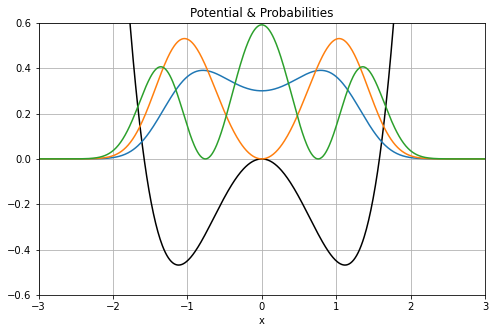

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors (psi) and their eigenvalues (E) 
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2) # and the prob^2
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()

# E0 = -0.46, quindi nel nostro esercizio non possiamo scendere al di sotto. Dovremmo trovare qualcosa sdi abbastanza simile.